### Environment render


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.family'] = 'Palatino Linotype'
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as patches


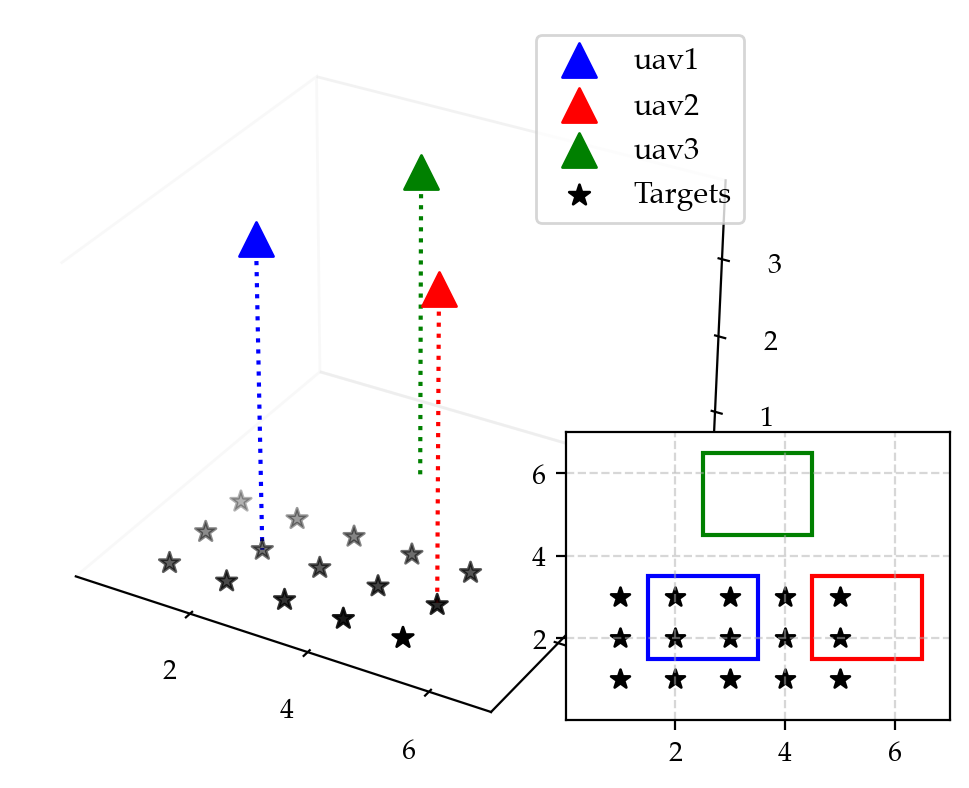

In [38]:
# Define the figure and 3D axis
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

# Set UAV positions (hovering above ground at z=4)
uav_positions = np.array([[2, 2, 4], [5, 2, 4], [3, 5, 4]])  
colors = ['blue', 'red', 'green']
labels = ['uav1', 'uav2', 'uav3']

# Define discrete target points on the x-y plane (integer grid positions)
target_points = np.array([
    [1, 1, 0], [2, 1, 0], [3, 1, 0], [4, 1, 0], [5, 1, 0],  
    [1, 2, 0], [2, 2, 0], [3, 2, 0], [4, 2, 0], [5, 2, 0],  
    [1, 3, 0], [2, 3, 0], [3, 3, 0], [4, 3, 0], [5, 3, 0],
])

# Define coverage rectangles for UAVs on the x-y plane
coverage_rects = [
    [1.5, 1.5, 2, 2],  # UAV1 covering 2x2 area around (2,2)
    [4.5, 1.5, 2, 2],  # UAV2 covering 2x2 area around (5,2)
    [2.5, 4.5, 2, 2]   # UAV3 covering 2x2 area around (3,5)
]

# Plot UAVs in 3D
for i, (uav, color, label) in enumerate(zip(uav_positions, colors, labels)):
    ax.scatter(uav[0], uav[1], uav[2], color=color, marker='^', s=150, label=label)  

    # Draw projection lines from UAV to ground
    ax.plot([uav[0], uav[0]], [uav[1], uav[1]], [uav[2], 0], linestyle="dotted", color=color)

# Plot discrete target points on the x-y plane
ax.scatter(target_points[:, 0], target_points[:, 1], target_points[:, 2], 
           color='black', marker='*', s=60, label="Targets")

# Force tick marks to be integers
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.zaxis.set_major_locator(MaxNLocator(integer=True))

# Set labels
# ax.set_xlabel("X-axis", fontsize=12, fontweight='bold')
# ax.set_ylabel("Y-axis", fontsize=12, fontweight='bold')
# ax.set_zlabel("Z-axis", fontsize=12, fontweight='bold')
ax.legend(fontsize=11)

# Set axis limits
ax.set_xlim([0, 7])
ax.set_ylim([0, 7])
ax.set_zlim([0, 4])
ax.set_xticks([2, 4, 6])
ax.set_yticks([2, 4, 6])
ax.set_zticks([1, 2, 3])
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False



# Plot UAV coverage as rectangles on the x-y plane
ax_2d = fig.add_axes([0.65, 0.15, 0.3, 0.3])  # Small inset plot
ax_2d.set_xlim(0, 7)
ax_2d.set_ylim(0, 7)
ax_2d.set_xticks([2, 4, 6])
ax_2d.set_yticks([2, 4, 6])
ax_2d.grid(True, linestyle='--', alpha=0.5)

# Add coverage rectangles
for rect, color in zip(coverage_rects, colors):
    x, y, w, h = rect
    ax_2d.add_patch(patches.Rectangle((x, y), w, h, linewidth=1.5, edgecolor=color, facecolor='none'))

# Add target points on inset plot
ax_2d.scatter(target_points[:, 0], target_points[:, 1], color='black', marker='*', s=50)

# ax_2d.set_title("Projection")
# ax_2d.set_xlabel("X-axis")
# ax_2d.set_ylabel("Y-axis")
plt.savefig('test_results/environment_render.png')
plt.show()
